Reference to:

GitHub repo:
https://github.com/alexppppp/synthetic-dataset-object-detection

# 1. Imports and functions
preset all the imports and make them easy to arrange

In [9]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import albumentations as A
import time
from tqdm import tqdm
from pathlib import Path
from datetime import datetime

def build_mask_from_img(image):
    # Make image gray before throwing into binary process
    mask = cv2.imread(image, cv2.IMREAD_UNCHANGED)

    # Binary process take place, set thresh value if needed
    thresh = 0
    mask = cv2.threshold(mask[:,:,3], thresh, 255, cv2.THRESH_BINARY)[1]

    # Bitwise the image with NOT operator to invert it
    mask = cv2.bitwise_not(mask)

    if mask is None:
        mask = np.zeros_like(image, dtype=np.uint8)
    return mask

# 2. Paths to files

In [10]:
obj_dict = {
    # 1: {'folder': 'Pfront_panel', 'longest_min': 285, 'longest_max': 4022}
    # 1: {'folder': "Cfastener", 'longest_min': 50, 'longest_max': 335}
    # 1: {'folder': "Cpin_noNut", 'longest_min': 85, 'longest_max': 250},
    1: {'folder': "Cpin_wNut", 'longest_min': 100, 'longest_max': 250},
    2:{'folder': "Cgoldcap", 'longest_min': 90, 'longest_max': 115}
    # 2: {'folder': 'Ccaptive', 'longest_min': 94, 'longest_max': 300},
    # 3: {'folder': 'Cejector', 'longest_min': 65, 'longest_max': 1000},
    # 1: {'folder': 'Clan', 'longest_min': 100, 'longest_max': 145},
    # 2: {'folder': 'Cmulcoax', 'longest_min': 45, 'longest_max': 285},
    # 3: {'folder': 'Ccaptive2', 'longest_min': 70, 'longest_max': 135},
    # 4: {'folder': 'Cmulframe', 'longest_min': 115, 'longest_max': 400},
    # 3: {'folder': 'Cpcie', 'longest_min': 66, 'longest_max': 350},
    # 4: {'folder': 'Cpowb', 'longest_min': 160, 'longest_max': 200},
    # 5: {'folder': 'Crc10', 'longest_min': 100, 'longest_max': 140},
    # 6: {'folder': 'Cusb', 'longest_min': 39, 'longest_max': 84}
    # 1: {'folder': "Cpowerp", 'longest_min': 265, 'longest_max': 450},
    # 2: {'folder': "Cpows_off", 'longest_min': 250, 'longest_max': 575},
    # 3: {'folder': "Cpows_on", 'longest_min': 250, 'longest_max': 600}
}

PATH_MAIN = "data"

for k, v in obj_dict.items():
    # Temp var
    masks_path = []

    # Access into the file
    folder_name = obj_dict[k]['folder']

    # Load the path to obj image file
    files_imgs = sorted(os.listdir(os.path.join(PATH_MAIN, folder_name, 'images')))
    files_imgs = [os.path.join(PATH_MAIN, folder_name, 'images', f) for f in files_imgs]

    #create folder if folder does not exist
    check_mask_path = os.path.join(PATH_MAIN, folder_name, 'masks')
    if not os.path.exists(check_mask_path):
        os.makedirs(check_mask_path)

    # Build /masks folder from the /images folder
    for image in files_imgs:      
        # Called function to build mask
        mask = build_mask_from_img(image=image)

        ## Now we obtain a whole black coloured object with a white color background
        # Preset the output for the mask
        mask_path = Path(image).stem # Get the img path
        mask_path = f"{mask_path}.png" # Set the extension
        mask_path = os.path.join(check_mask_path, mask_path) # Define the path
        
        #save mask
        cv2.imwrite(mask_path, mask)

        #bring to outer-layer path to record
        masks_path.append(mask_path)
    
    obj_dict[k]['images'] = files_imgs
    obj_dict[k]['masks'] = masks_path

# Load the background files
files_bg_imgs = os.listdir(os.path.join(PATH_MAIN, 'bg'))
files_bg_imgs = [os.path.join(PATH_MAIN, 'bg', f) for f in files_bg_imgs]

# Load the path of background_noise files
files_bg_noise_imgs = os.listdir(os.path.join(PATH_MAIN, "bg_noise", "images"))
files_bg_noise_imgs = [os.path.join(PATH_MAIN, "bg_noise", "images", f) for f in files_bg_noise_imgs]

#create folder if folder does not exist
check_noise_mask_path = os.path.join(PATH_MAIN, 'bg_noise', 'masks')
if not os.path.exists(check_noise_mask_path):
    os.makedirs(check_noise_mask_path)

files_bg_noise_masks = []

#Build mask for noise
for image in files_bg_noise_imgs:
    #Build mask 
    noise_mask = build_mask_from_img(image = image)

    ## Now we obtain a whole black coloured object with a white color background
    # Preset the output for the mask
    noise_mask_path = Path(image).stem # Get the img path
    noise_mask_path = f"{noise_mask_path}.png" # Set the extension
    noise_mask_path = os.path.join(check_noise_mask_path, noise_mask_path) # Define the path
    
    #save mask
    cv2.imwrite(noise_mask_path, noise_mask)

    #bring to outer-layer path to record
    files_bg_noise_masks.append(noise_mask_path)

print(f"The first five files from the sorted list of {obj_dict[1]['folder']} images:", obj_dict[1]['images'][:5])
print(f"\nThe first five files from the sorted list of {obj_dict[1]['folder']} masks:", obj_dict[1]['masks'][:5])
print("\nThe first five files from the sorted list of background images:", files_bg_imgs[:5])
print("\nThe first five files from the sorted list of background noise images:", files_bg_noise_imgs[:5])
print("\nThe first five files from the sorted list of background noise masks:", files_bg_noise_masks[:5])

The first five files from the sorted list of Cpin_wNut images: ['data\\Cpin_wNut\\images\\Cpin_wNut_1.png', 'data\\Cpin_wNut\\images\\Cpin_wNut_10.png', 'data\\Cpin_wNut\\images\\Cpin_wNut_2.png', 'data\\Cpin_wNut\\images\\Cpin_wNut_3.png', 'data\\Cpin_wNut\\images\\Cpin_wNut_4.png']

The first five files from the sorted list of Cpin_wNut masks: ['data\\Cpin_wNut\\masks\\Cpin_wNut_1.png', 'data\\Cpin_wNut\\masks\\Cpin_wNut_10.png', 'data\\Cpin_wNut\\masks\\Cpin_wNut_2.png', 'data\\Cpin_wNut\\masks\\Cpin_wNut_3.png', 'data\\Cpin_wNut\\masks\\Cpin_wNut_4.png']

The first five files from the sorted list of background images: ['data\\bg\\20230829_151854_ej.png', 'data\\bg\\20230829_152012_ej.png', 'data\\bg\\20230829_152103_ej.png', 'data\\bg\\20230829_152131_ej.png', 'data\\bg\\20230829_152253_ej.png']

The first five files from the sorted list of background noise images: ['data\\bg_noise\\images\\10.png', 'data\\bg_noise\\images\\11.png', 'data\\bg_noise\\images\\12.png', 'data\\bg_noise

# 3. Images and masks

In [11]:
def get_img_and_mask(img_path, mask_path):

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    mask = cv2.imread(mask_path)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    
    mask_b = mask[:,:,0] == 0 # This is boolean mask
    mask = mask_b.astype(np.uint8) # This is binary mask
    
    return img, mask

Image file: data\Cpin_wNut\images\Cpin_wNut_1.png
Mask file: data\Cpin_wNut\masks\Cpin_wNut_1.png

Shape of the image of the object: (186, 150, 3)
Shape of the binary mask: (186, 150)


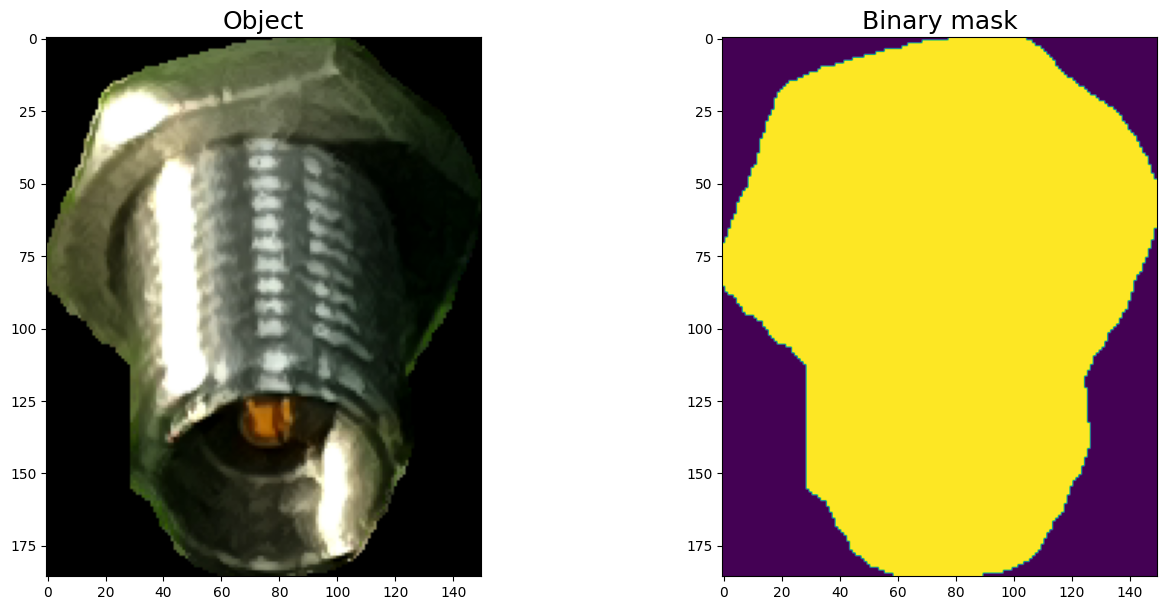

In [12]:
# Let's look at a random object and its binary mask

img_path = obj_dict[1]['images'][0]
mask_path = obj_dict[1]['masks'][0]

img, mask = get_img_and_mask(img_path, mask_path)

print("Image file:", img_path)
print("Mask file:", mask_path)
print("\nShape of the image of the object:", img.shape)
print("Shape of the binary mask:", mask.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(img)
ax[0].set_title('Object', fontsize=18)
ax[1].imshow(mask)
ax[1].set_title('Binary mask', fontsize=18);

# 4. Resizing background images

In [13]:
def resize_img(img, desired_max, desired_min=None):
   
    h, w = img.shape[0], img.shape[1]
    
    longest, shortest = max(h, w), min(h, w)
    longest_new = desired_max
    if desired_min:
        shortest_new = desired_min
    else:
        shortest_new = int(shortest * (longest_new / longest))
    
    if h > w:
        h_new, w_new = longest_new, shortest_new
    else:
        h_new, w_new = shortest_new, longest_new
        
    transform_resize = A.Compose([
        A.Sequential([
        A.Resize(h_new, w_new, interpolation=1, always_apply=False, p=1)
        ], p=1)
    ])

    transformed = transform_resize(image=img)
    img_r = transformed["image"]
        
    return img_r

Shape of the original background image: (3040, 4056, 3)
Shape of the resized background image (desired_max=1920, desired_min=None): (1439, 1920, 3)
Shape of the resized background image (desired_max=1920, desired_min=1080): (1080, 1920, 3)


Text(0.5, 1.0, 'Resized (desired_max=1920, desired_min=1080)')

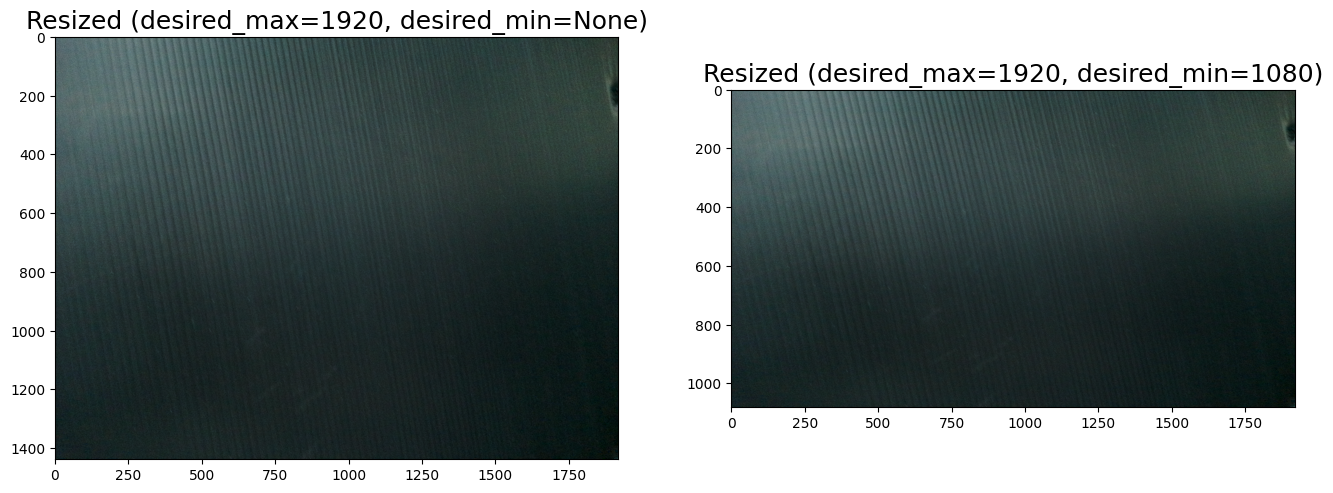

In [14]:
# Let's look how a random background image can be resized with resize_img() function

img_bg_path = files_bg_imgs[5]
img_bg = cv2.imread(img_bg_path)
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)

img_bg_resized_1 = resize_img(img_bg, desired_max=1920, desired_min=None)
img_bg_resized_2 = resize_img(img_bg, desired_max=1920, desired_min=1080)

print("Shape of the original background image:", img_bg.shape)

print("Shape of the resized background image (desired_max=1920, desired_min=None):", img_bg_resized_1.shape)
print("Shape of the resized background image (desired_max=1920, desired_min=1080):", img_bg_resized_2.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(img_bg_resized_1)
ax[0].set_title('Resized (desired_max=1920, desired_min=None)', fontsize=18)
ax[1].imshow(img_bg_resized_2)
ax[1].set_title('Resized (desired_max=1920, desired_min=1080)', fontsize=18)

# 5. Resizing and transforming objects

In [15]:
def resize_transform_obj(img, mask, longest_min, longest_max, transforms=False):
   
    h, w = mask.shape[0], mask.shape[1]
    
    longest, shortest = max(h, w), min(h, w)
    longest_new = np.random.randint(longest_min, longest_max)
    shortest_new = int(shortest * (longest_new / longest))
    
    if h > w:
        h_new, w_new = longest_new, shortest_new
    else:
        h_new, w_new = shortest_new, longest_new
        
    transform_resize = A.Resize(h_new, w_new, interpolation=1, always_apply=False, p=1)

    transformed_resized = transform_resize(image=img, mask=mask)
    img_t = transformed_resized["image"]
    mask_t = transformed_resized["mask"]
        
    if transforms:
        transformed = transforms(image=img_t, mask=mask_t)
        img_t = transformed["image"]
        mask_t = transformed["mask"]
        
    return img_t, mask_t

transforms_bg_obj = A.Compose([
    A.RandomRotate90(p=1),
    A.ColorJitter(brightness=0.3,
                  contrast=0.3,
                  saturation=0.3,
                  hue=0.07,
                  always_apply=False,
                  p=1),
    A.Blur(blur_limit=(3,15),
           always_apply=False,
           p=0.5)
])

transforms_obj = A.Compose([
    A.RandomRotate90(p=1),
    A.RandomBrightnessContrast(brightness_limit=(-0.1, 0.2),
                               contrast_limit=0.1,
                               brightness_by_max=True,
                               always_apply=False,
                               p=1)
])

Shape of the image of the transformed object: (388, 312, 3)
Shape of the transformed binary mask: (388, 312)




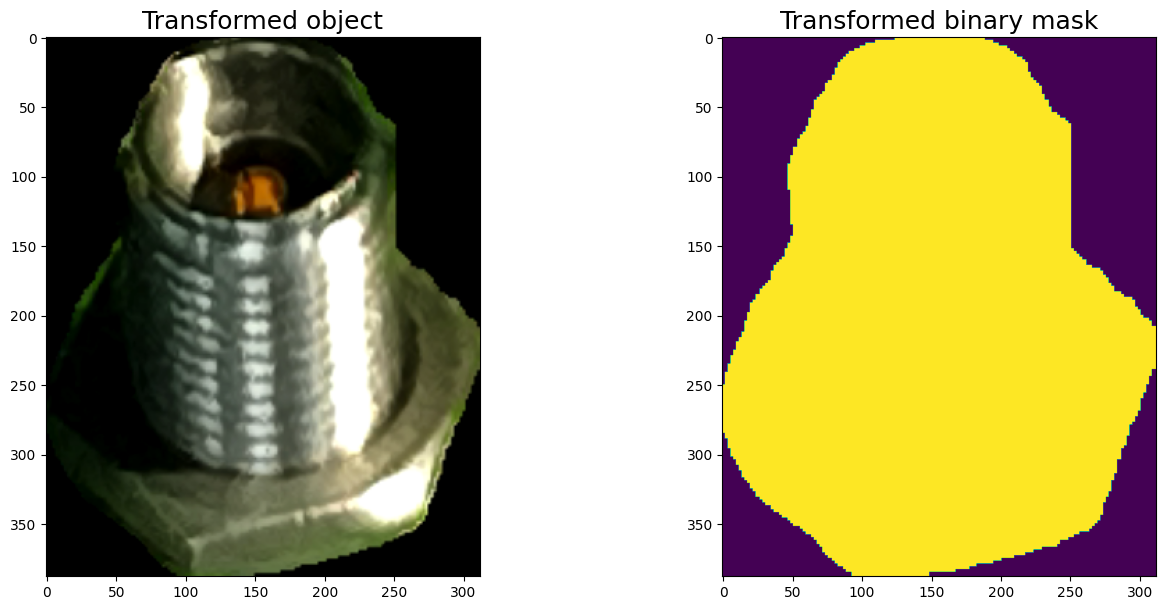

In [16]:
# Let's look how image and binary mask of a random object can be transformed
# with help of resize_transform_obj() function

img_path = obj_dict[1]['images'][0]
mask_path = obj_dict[1]['masks'][0]

img, mask = get_img_and_mask(img_path, mask_path)

img_t, mask_t = resize_transform_obj(img,
                                     mask,
                                     longest_min=300,
                                     longest_max=400,
                                     transforms=transforms_obj)

print("Shape of the image of the transformed object:", img_t.shape)
print("Shape of the transformed binary mask:", mask_t.shape)
print("\n")

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(img_t)
ax[0].set_title('Transformed object', fontsize=18)
ax[1].imshow(mask_t)
ax[1].set_title('Transformed binary mask', fontsize=18);

# 6. Adding object to background

In [17]:
def add_obj(img_comp, mask_comp, img, mask, x, y, idx):
    '''
    img_comp - composition of objects
    mask_comp - composition of objects` masks
    img - image of object
    mask - binary mask of object
    x, y - coordinates where center of img is placed
    Function returns img_comp in CV2 RGB format + mask_comp
    '''
    h_comp, w_comp = img_comp.shape[0], img_comp.shape[1]
    
    h, w = img.shape[0], img.shape[1]
    
    x = x - int(w/2) # Find the left side of img
    y = y - int(h/2) # Find the up side of img
    # So that (x, y) now being upper left corner of img
    
    # Cast into int to ensure Dataframe can manage
    x = int(x)
    y = int(y)

    mask_b = mask == 1
    mask_rgb_b = np.stack([mask_b, mask_b, mask_b], axis=2)


    # h_part - part of the image which gets into the frame of img_comp along y-axis
    # w_part - part of the image which gets into the frame of img_comp along x-axis
    if x >= 0 and y >= 0:
    
        h_part = int(h - max(0, y+h-h_comp)) 
        w_part = int(w - max(0, x+w-w_comp)) 

        # Assign part of img_comp by new value. '~' bitwise NOT. 
        img_comp[y:y+h_part, x:x+w_part, :] = img_comp[y:y+h_part, x:x+w_part, :] * ~mask_rgb_b[0:h_part, 0:w_part, :] + (img * mask_rgb_b)[0:h_part, 0:w_part, :]
        mask_comp[y:y+h_part, x:x+w_part] = mask_comp[y:y+h_part, x:x+w_part] * ~mask_b[0:h_part, 0:w_part] + (idx * mask_b)[0:h_part, 0:w_part]
        mask_added = mask[0:h_part, 0:w_part]
        
    elif x < 0 and y < 0:
        
        h_part = int(h + y)
        w_part = int(w + x)
        
        img_comp[0:0+h_part, 0:0+w_part, :] = img_comp[0:0+h_part, 0:0+w_part, :] * ~mask_rgb_b[h-h_part:h, w-w_part:w, :] + (img * mask_rgb_b)[h-h_part:h, w-w_part:w, :]
        mask_comp[0:0+h_part, 0:0+w_part] = mask_comp[0:0+h_part, 0:0+w_part] * ~mask_b[h-h_part:h, w-w_part:w] + (idx * mask_b)[h-h_part:h, w-w_part:w]
        mask_added = mask[h-h_part:h, w-w_part:w]
        
    elif x < 0 and y >= 0:
        
        h_part = int(h - max(0, y+h-h_comp))
        w_part = int(w + x)
        
        img_comp[y:y+h_part, 0:0+w_part, :] = img_comp[y:y+h_part, 0:0+w_part, :] * ~mask_rgb_b[0:h_part, w-w_part:w, :] + (img * mask_rgb_b)[0:h_part, w-w_part:w, :]
        mask_comp[y:y+h_part, 0:0+w_part] = mask_comp[y:y+h_part, 0:0+w_part] * ~mask_b[0:h_part, w-w_part:w] + (idx * mask_b)[0:h_part, w-w_part:w]
        mask_added = mask[0:h_part, w-w_part:w]
        
    elif x >= 0 and y < 0:
        
        h_part = int(h + y)
        w_part = int(w - max(0, x+w-w_comp))
        
        img_comp[0:0+h_part, x:x+w_part, :] = img_comp[0:0+h_part, x:x+w_part, :] * ~mask_rgb_b[h-h_part:h, 0:w_part, :] + (img * mask_rgb_b)[h-h_part:h, 0:w_part, :]
        mask_comp[0:0+h_part, x:x+w_part] = mask_comp[0:0+h_part, x:x+w_part] * ~mask_b[h-h_part:h, 0:w_part] + (idx * mask_b)[h-h_part:h, 0:w_part]
        mask_added = mask[h-h_part:h, 0:w_part]
    
    return img_comp, mask_comp, mask_added

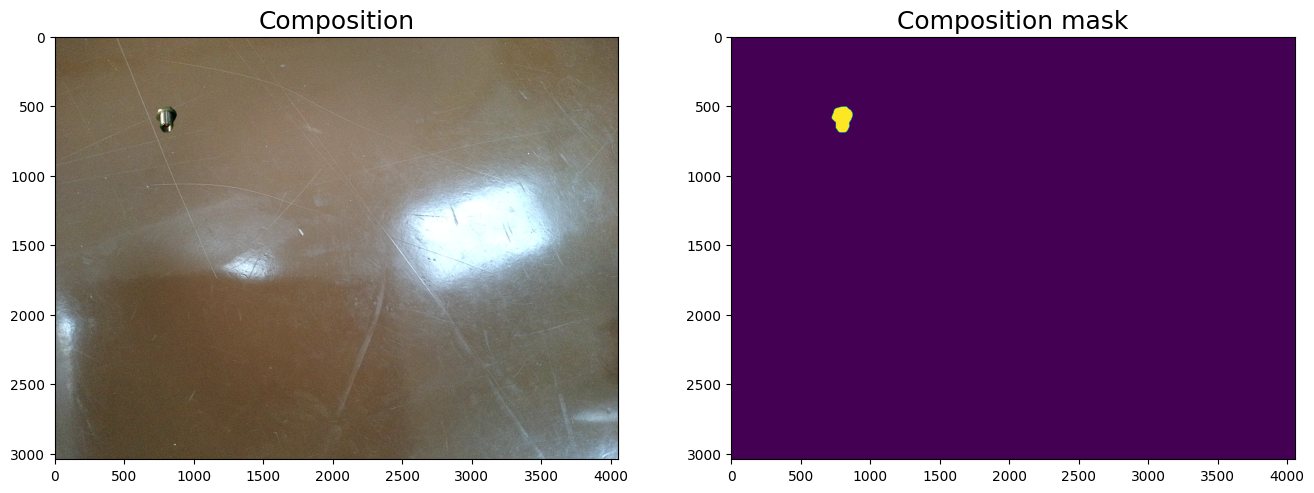

In [18]:
img_bg_path = files_bg_imgs[1]
img_bg = cv2.imread(img_bg_path)
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)

h, w = img_bg.shape[0], img_bg.shape[1]
mask_comp = np.zeros((h,w), dtype=np.uint8)

img_path = obj_dict[1]['images'][0]
mask_path = obj_dict[1]['masks'][0]
img, mask = get_img_and_mask(img_path, mask_path)

img_comp, mask_comp, _ = add_obj(img_bg, mask_comp, img, mask, x=800, y=600, idx=1)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(img_comp)
ax[0].set_title('Composition', fontsize=18)
ax[1].imshow(mask_comp)
ax[1].set_title('Composition mask', fontsize=18);

Text(0.5, 1.0, 'Composition mask')

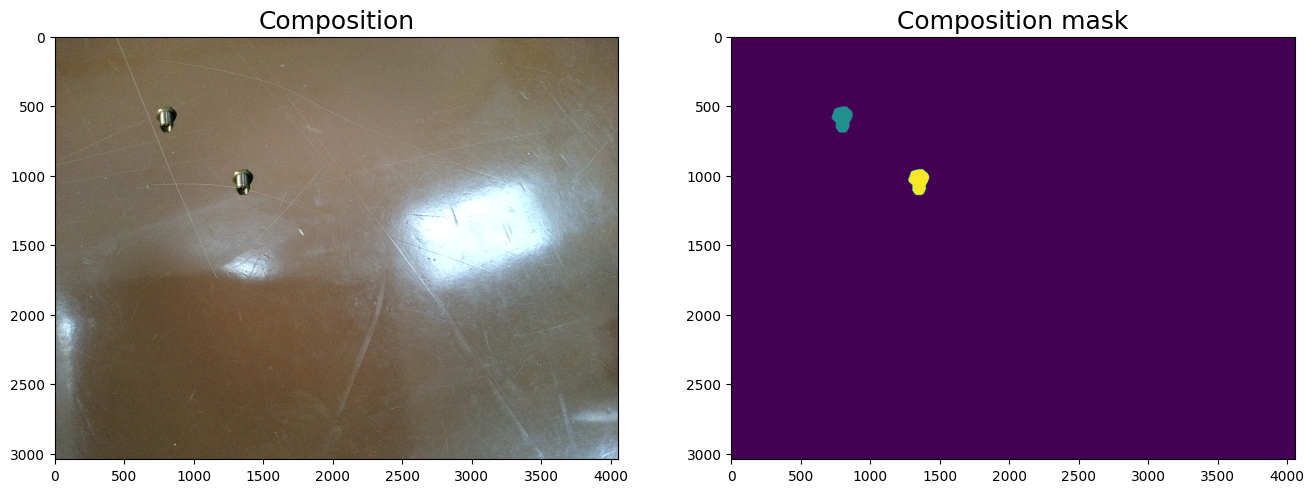

In [19]:
img_comp, mask_comp, _ = add_obj(img_comp, mask_comp, img, mask, x=1350, y=1050, idx=2)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(img_comp)
ax[0].set_title('Composition', fontsize=18)
ax[1].imshow(mask_comp)
ax[1].set_title('Composition mask', fontsize=18)

# 7. Adding noise objects to background

In [20]:
def create_bg_with_noise(files_bg_imgs,
                         files_bg_noise_imgs,
                         files_bg_noise_masks,
                         bg_max=4056, # Image max side length in pixel
                         bg_min=3040, # Image min side length in pixel
                         max_objs_to_add=10,
                         longest_bg_noise_max=120,
                         longest_bg_noise_min=50,
                         blank_bg=False):
    
    if blank_bg:
        img_comp_bg = np.ones((bg_min, bg_max,3), dtype=np.uint8) * 255
        mask_comp_bg = np.zeros((bg_min, bg_max), dtype=np.uint8)
    else:    
        idx = np.random.randint(len(files_bg_imgs))
        img_bg = cv2.imread(files_bg_imgs[idx])
        img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)
        img_comp_bg = resize_img(img_bg, bg_max, bg_min)
        mask_comp_bg = np.zeros((img_comp_bg.shape[0], img_comp_bg.shape[1]), dtype=np.uint8)

    # Randomize obj and randomize size number
    for i in range(1, np.random.randint(max_objs_to_add) + 2):
        idx = np.random.randint(len(files_bg_noise_imgs))
        img, mask = get_img_and_mask(files_bg_noise_imgs[idx], files_bg_noise_masks[idx])
        x, y = np.random.randint(img_comp_bg.shape[1]), np.random.randint(img_comp_bg.shape[0])
        img_t, mask_t = resize_transform_obj(img, mask, longest_bg_noise_min, longest_bg_noise_max, transforms=transforms_bg_obj)
        img_comp_bg, _, _ = add_obj(img_comp_bg, mask_comp_bg, img_t, mask_t, x, y, i)
        
    return img_comp_bg

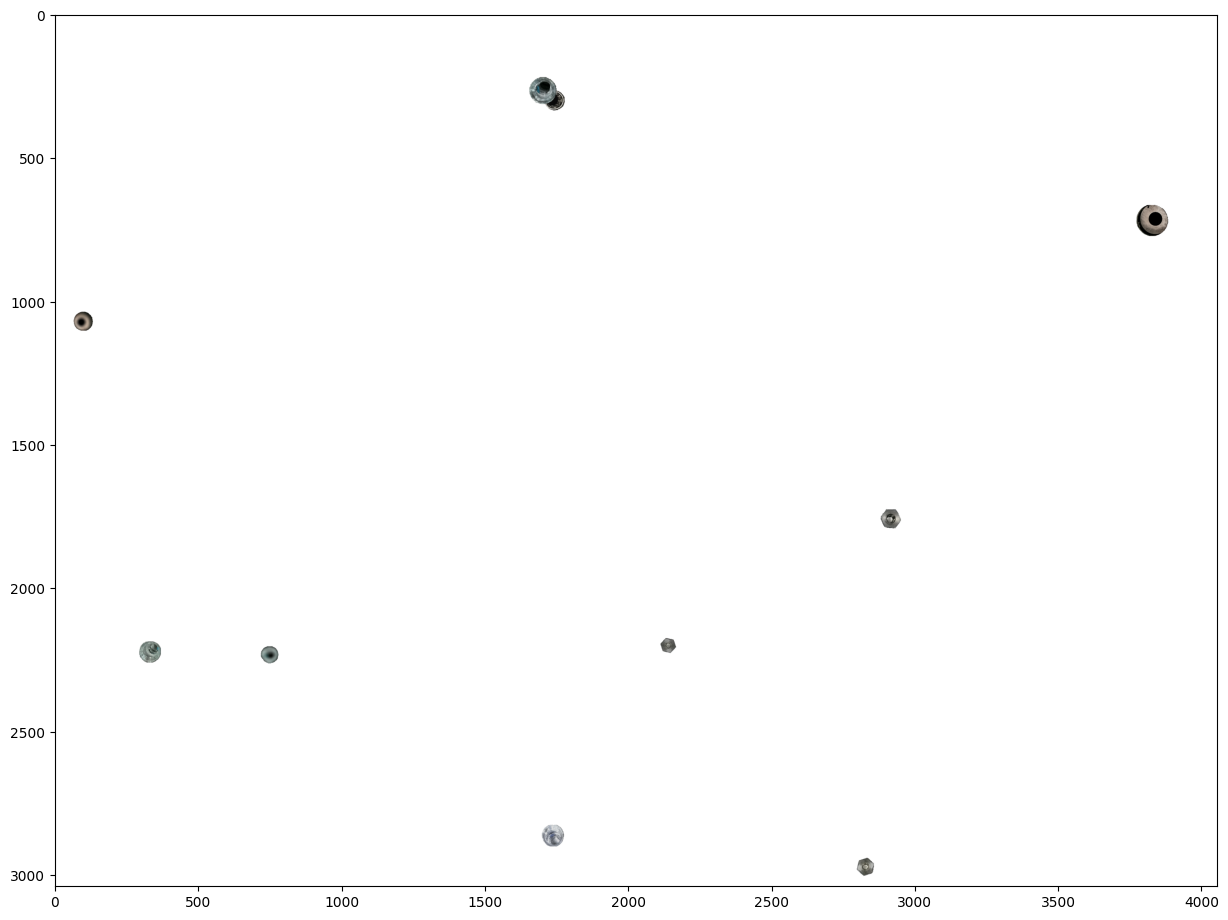

In [21]:
img_comp_bg = create_bg_with_noise(files_bg_imgs,
                                   files_bg_noise_imgs,
                                   files_bg_noise_masks,
                                   max_objs_to_add=10,
                                   blank_bg=True)
plt.figure(figsize=(15,15))
plt.imshow(img_comp_bg)

In [ ]:
img_comp_bg = create_bg_with_noise(files_bg_imgs,
                                   files_bg_noise_imgs,
                                   files_bg_noise_masks,
                                   max_objs_to_add=5)
plt.figure(figsize=(15,15))
plt.imshow(img_comp_bg)

# 8. Controlling degree of overlapping

In [ ]:
def check_areas(mask_comp, obj_areas, overlap_degree=0.3):
    obj_ids = np.unique(mask_comp).astype(np.uint8)[1:-1]
    masks = mask_comp == obj_ids[:, None, None]
    
    ok = True
    
    if len(np.unique(mask_comp)) != np.max(mask_comp) + 1:
        ok = False
        return ok
    
    for idx, mask in enumerate(masks):
        if np.count_nonzero(mask) / obj_areas[idx] < 1 - overlap_degree:
            ok = False
            break
            
    return ok

# 9. Creating synthetic composition

In [ ]:
def create_composition(img_comp_bg,
                       max_objs=15,
                       overlap_degree=0, # 0 - 1
                       max_attempts_per_obj=3,
                       outbounding = False):

    img_comp = img_comp_bg.copy()
    h, w = img_comp.shape[0], img_comp.shape[1]
    mask_comp = np.zeros((h,w), dtype=np.uint8)
    
    obj_areas = []
    labels_comp = []
    num_objs = np.random.randint(max_objs) + 2
    
    i = 1
    
    for _ in range(1, num_objs):

        obj_idx = np.random.randint(len(obj_dict)) + 1
        
        for _ in range(max_attempts_per_obj):

            imgs_number = len(obj_dict[obj_idx]['images'])
            idx = np.random.randint(imgs_number)
            img_path = obj_dict[obj_idx]['images'][idx]
            mask_path = obj_dict[obj_idx]['masks'][idx]
            img, mask = get_img_and_mask(img_path, mask_path)

            longest_min = obj_dict[obj_idx]['longest_min']
            longest_max = obj_dict[obj_idx]['longest_max']
            img, mask = resize_transform_obj(img,
                                             mask,
                                             longest_min,
                                             longest_max,
                                             transforms=transforms_obj)

            # Make changes to x, y if wanted to define the size of instances composite into the image
            # Needed to modify that the random number is always yStart = imgh/2 and xStart = imgw/2 at least and always between imgyMax-h/2 and imgxMax-w/2
            # If outbounding == True, means instances added are allowed to clipped in half of the images

            instance_h, instance_w = img.shape[0], img.shape[1]
            x, y = 0, 0
            
            if outbounding:
                x, y = np.random.randint(w), np.random.randint(h)
            else:
                x, y = ((instance_w/2)+np.random.randint((w-instance_w))), ((instance_h/2)+np.random.randint((h-instance_h)))
            

            if i == 1:
                img_comp, mask_comp, mask_added = add_obj(img_comp,
                                                          mask_comp,
                                                          img,
                                                          mask,
                                                          x,
                                                          y,
                                                          i)
                obj_areas.append(np.count_nonzero(mask_added))
                labels_comp.append(obj_idx)
                i += 1
                break
            else:        
                img_comp_prev, mask_comp_prev = img_comp.copy(), mask_comp.copy()
                img_comp, mask_comp, mask_added = add_obj(img_comp,
                                                          mask_comp,
                                                          img,
                                                          mask,
                                                          x,
                                                          y,
                                                          i)
                ok = check_areas(mask_comp, obj_areas, overlap_degree)
                if ok:
                    obj_areas.append(np.count_nonzero(mask_added))
                    labels_comp.append(obj_idx)
                    i += 1
                    break
                else:
                    img_comp, mask_comp = img_comp_prev.copy(), mask_comp_prev.copy()        
        
    return img_comp, mask_comp, labels_comp, obj_areas

In [ ]:
img_comp, mask_comp, labels_comp, obj_areas = create_composition(img_comp_bg,
                                                                 max_objs=25,
                                                                 overlap_degree=0, # 0-1
                                                                 max_attempts_per_obj = 7)
plt.figure(figsize=(40,40))
plt.imshow(img_comp)

In [ ]:
plt.figure(figsize=(40,40))
plt.imshow(mask_comp)

In [ ]:
print("Labels (classes of the objects) on the composition in order of object's addition:", labels_comp)

In [ ]:
obj_ids = np.unique(mask_comp).astype(np.uint8)[1:]
masks = mask_comp == obj_ids[:, None, None]

print("Degree of how much area of each object is overlapped:")

for idx, mask in enumerate(masks):
    print(np.count_nonzero(mask) / obj_areas[idx])

In [ ]:
colors = {1: (255,0,0), 2: (0,255,0), 3: (0,0,255), 4: (125, 0, 125), 5: (125, 125, 0), 6: (125, 75, 75), 7: (60, 125, 200), 8: (35, 250, 100), 9: (200, 170, 170), 10:(0, 255, 250), 11: (200,200,200), 12:(180,90, 190), 13:(35,35,170)}

img_comp_bboxes = img_comp.copy()

obj_ids = np.unique(mask_comp).astype(np.uint8)[1:]
masks = mask_comp == obj_ids[:, None, None]

for i in range(len(obj_ids)):
    pos = np.where(masks[i])
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])
    img_comp_bboxes = cv2.rectangle(img_comp_bboxes,
                                    (xmin, ymin),
                                    (xmax,ymax),
                                    colors[labels_comp[i]],
                                    6)
    
plt.figure(figsize=(40,40))
plt.imshow(img_comp_bboxes)    

# 10. Annotations in YOLO format

In [ ]:
def create_yolo_annotations(mask_comp, labels_comp):
    comp_w, comp_h = mask_comp.shape[1], mask_comp.shape[0]
    
    obj_ids = np.unique(mask_comp).astype(np.uint8)[1:]
    masks = mask_comp == obj_ids[:, None, None]

    annotations_yolo = []
    for i in range(len(labels_comp)):
        pos = np.where(masks[i])
        xmin = np.min(pos[1])
        xmax = np.max(pos[1])
        ymin = np.min(pos[0])
        ymax = np.max(pos[0])

        xc = (xmin + xmax) / 2
        yc = (ymin + ymax) / 2
        w = xmax - xmin
        h = ymax - ymin

        annotations_yolo.append([labels_comp[i] - 1,
                                 round(xc/comp_w, 5),
                                 round(yc/comp_h, 5),
                                 round(w/comp_w, 5),
                                 round(h/comp_h, 5)])

    return annotations_yolo

In [ ]:
annotations_yolo = create_yolo_annotations(mask_comp, labels_comp)
for i in range(len(annotations_yolo)):
    print(' '.join(str(el) for el in annotations_yolo[i]))

# 11. Creating and saving synthetic dataset

In [ ]:
def generate_dataset(imgs_number, folder, split='train'):
    # Check on the file path if exists, else create
    os.makedirs(os.path.join(folder, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(folder, split, 'labels'), exist_ok=True)

    # Get current date and time
    clock = datetime.today().strftime('%Y%m%d%H%M')
    time_start = time.time()
    for j in tqdm(range(imgs_number)):
        img_comp_bg = create_bg_with_noise(files_bg_imgs,
                                           files_bg_noise_imgs,
                                           files_bg_noise_masks,
                                           max_objs_to_add=7)
        
        img_comp, mask_comp, labels_comp, _ = create_composition(img_comp_bg,
                                                                 max_objs=15, 
                                                                 overlap_degree=0, # 0 - 1
                                                                 max_attempts_per_obj=9)

        img_comp = cv2.cvtColor(img_comp, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(folder, split, 'images/{}_s{}.jpg').format(clock, j), img_comp)

        # Get annotation
        annotations_yolo = create_yolo_annotations(mask_comp, labels_comp)

        # Put into \.txt file
        for i in range(len(annotations_yolo)):
            with open(os.path.join(folder, split, 'labels/{}_s{}.txt').format(clock, j), "a") as f:
                f.write(' '.join(str(el) for el in annotations_yolo[i]) + '\n')
        
    # Create a str storing class information
    temp_str = ''
    for key, value in obj_dict.items():
        instance_name = obj_dict[key]['folder']
        temp_str += instance_name + '\n'

    # Write class infomation into a txt file at /dataset
    temp_path = os.path.join(os.getcwd(),folder,'Classes.txt')
    info = open(temp_path, 'w')
    info.write(temp_str)
    info.close()
                
    time_end = time.time()
    time_total = round(time_end - time_start)
    time_per_img = round((time_end - time_start) / imgs_number, 1)
    
    print("Generation of {} synthetic images is completed. It took {} seconds, or {} seconds per image".format(imgs_number, time_total, time_per_img))
    print("Images are stored in '{}'".format(os.path.join(folder, split, 'images')))
    print("Annotations are stored in '{}'".format(os.path.join(folder, split, 'labels')))

In [ ]:
generate_dataset(40, folder='dataset', split='train')
# generate_dataset(200, folder='dataset', split='valid')